## AI CA 1

ابتدا کتاب‌خانه‌های لازم را به برنامه اضافه می کنیم 

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

سپس اطلاعات فایل سی‌اس‌وی را به کمک پاندا می‌خوانیم

In [2]:
data = pd.read_csv("./ride.csv")

با دستور زیر حدود کلی‌ای از اطلاعات را به دست می‌اوریم

In [112]:
data.describe()

,duration,distance,price
count,500.000000,500.000000,500.000000
mean,1286.628000,12549.244000,13876.000000
std,479.596425,5848.525562,3677.481031
min,601.000000,1583.000000,6835.000000
25%,910.750000,8024.250000,10835.000000
50%,1206.500000,11583.500000,13835.000000
75%,1582.250000,16409.750000,16335.000000
max,2911.000000,34800.000000,24335.000000


با کشیدن هیستوگرام مربوط به زمان، مسافت و هزینه، توزیع آن‌ها را مشاهده می‌کنیم<br>
که در آن هزینه و مسافت تقریبا توزیعی نرمال دارند اما زمان در ابتدا بیشترین تراکم را دارد و با افزایش مقدار، تکرارش کاهش میابد

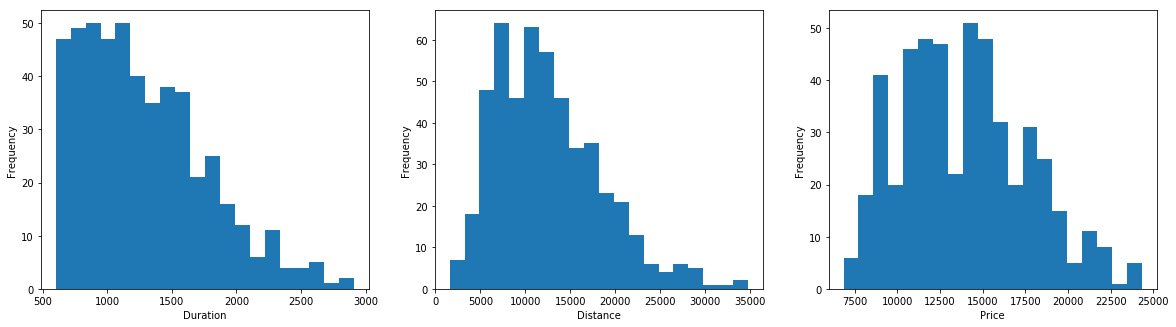

In [119]:
fig, axes = plt.subplots(1, 3)

data['duration'].plot(kind='hist', bins=20, ax=axes[0])
axes[0].set_xlabel('Duration')

data['distance'].plot(kind='hist', bins=20, ax=axes[1])
axes[1].set_xlabel('Distance')

data['price'].plot(kind='hist', bins=20, ax=axes[2])
axes[2].set_xlabel('Price')

fig.set_size_inches(20, 5)
fig.subplots_adjust(top=0.9)

حال با کشیدن نمودارهای مسافت بر حسب قیمت و زمان بر حسب قیمت، تا حدی کلیت داده‌ها را می‌بینیم.<br>
نوع زمان بر حسب قیمت حالت خطی‌تری دارد و از نظم خطی بیشتری برخوردار است،<br>
لذا من از پارامتر زمان برای تخمین خود استفاده کردم

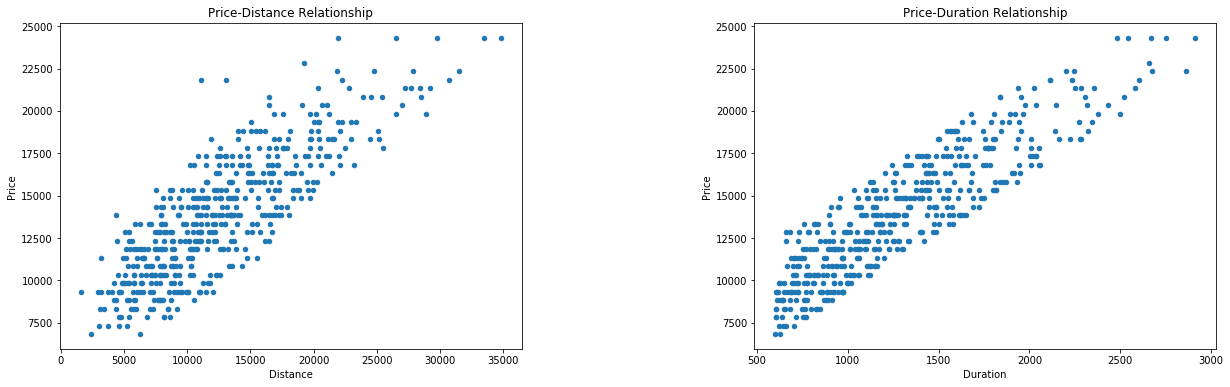

In [120]:
fig, ax = plt.subplots(1, 2)
ax[0].scatter(data['distance'], data['price'], s=20)
ax[0].set_xlabel('Distance')
ax[0].set_ylabel('Price')
ax[0].set_title('Price-Distance Relationship')

ax[1].scatter(data['duration'], data['price'], s=20)
ax[1].set_xlabel('Duration')
ax[1].set_ylabel('Price')
ax[1].set_title('Price-Duration Relationship')

fig.tight_layout()
fig.set_size_inches(20,6)
fig.subplots_adjust(top=0.9)

در کد زیر محاسبات لازم برای به دست آوردن ضرایب خط از روی دو نقطه آمده است<br>
در قسمت بعدی من از این توابع استفاده کرده‌ام و با دادن مختصات دو نقطه، یک خط رسم کرده و خطای آن را محاسبه کرده‌ام

In [128]:
slope = 0
intercept = 0

def calc_line_params(x1, x2, y1, y2):
    global slope, intercept
    slope = (y2 - y1) / (x2 -x1)
    intercept = y1 - x1 * slope

def estimate_price(duration):
    return slope * duration + intercept

def calc_error(x1, x2, y1, y2):
    calc_line_params(x1, x2, y1, y2)
    error = 0
    for index, row in data.iterrows():
        error += (row['price'] - estimate_price(row['duration'])) ** 2
    return error

def print_line_info(error):
    print('y =', slope, '* x +', intercept)
    print('error:', error)

برای مثال مقدار خطا و ضرایب خط برای دو نقطه با مشخصات زیر بدین صورت است

In [129]:
x1, y1 = 500, 8700
x2, y2 = 2800, 25000
error = calc_error(x1, x2, y1, y2)
print_line_info(error)

y = 7.086956521739131 * x + 5156.521739130434
error: 1375450401.10019


حال برای شهود بیشتر و کمی ازمون و خطا، برای ۴ خط مختلف خطا را به دست آورده و خط را روی نمودار می‌کشم تا مشخص شود کدام حالت خطای کمتری دارد<br>
(در عنوان هر نمودار خطای تخمین مربوط به خط آن نوشته شده)

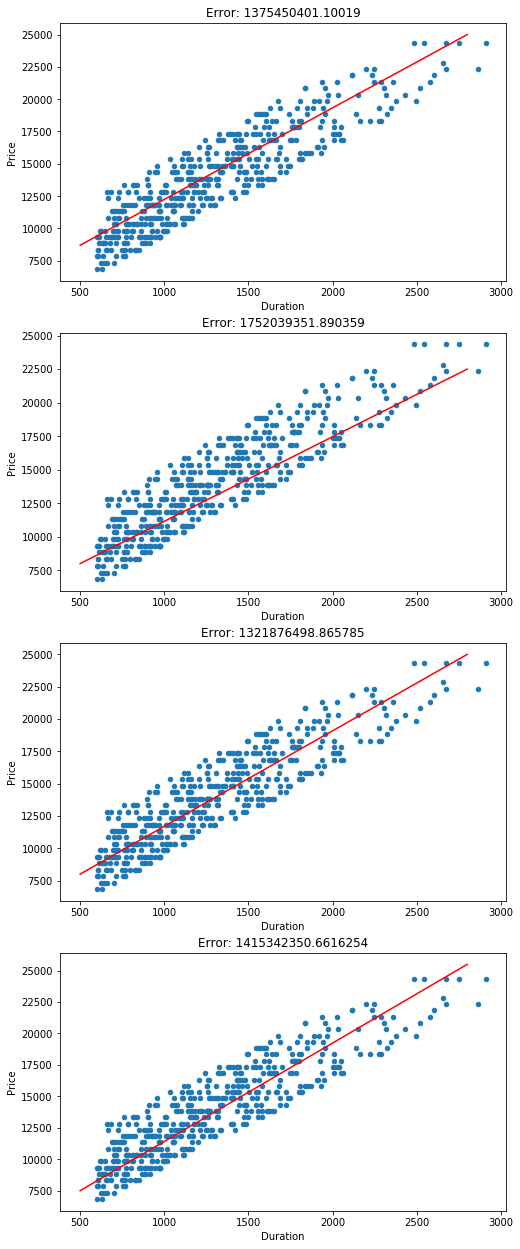

In [125]:
candidates = [
    [500, 2800, 8700, 25000],
    [500, 2800, 8000, 22500],
    [500, 2800, 8000, 25000],
    [500, 2800, 7500, 25500],
]
fig, ax = plt.subplots(len(candidates), 1)
for index, candidate in enumerate(candidates):
    x1, x2, y1, y2 = candidate
    ax[index].scatter(data['duration'], data['price'], s=20)
    ax[index].plot([x1, x2], [y1, y2], color='red')
    ax[index].set_xlabel('Duration')
    ax[index].set_ylabel('Price')
    ax[index].set_title('Error: {}'.format(calc_error(x1, x2, y1, y2)))
fig.set_size_inches(8, 20)
fig.subplots_adjust(top=0.95)

که در نمودار سوم، خطای کمتری نسبت به سایر داریم و لذا به عنوان بهترین خط آن را انتخاب می‌کنیم

In [130]:
best_candidatee = (500, 2800, 8000, 25000)
error = calc_error(*best_candidatee)
print_line_info(error)

y = 7.391304347826087 * x + 4304.347826086956
error: 1321876498.865785


حال برای تولید ۱۰ زمان تصادفی، اطلاعات زمان‌های موجود در داده‌ها را چاپ می‌کنیم

In [131]:
data['duration'].describe()

count     500.000000
mean     1286.628000
std       479.596425
min       601.000000
25%       910.750000
50%      1206.500000
75%      1582.250000
max      2911.000000
Name: duration, dtype: float64

که با توجه به این آمار و توزیع زمان در نمودارهای قبلی، شروع ۶۱۰ و پایان ۲۵۰۰ را به عنوان محدوده‌ی زمان‌های رندوم انتخاب کردم<br>

In [132]:
sample_durations = np.random.uniform(low=610, high=2500, size=(10,)).astype(int)

حال هزینه‌ی تخمین زده شده را از روی زمان‌های نمونه تولیدی محاسبه می‌کنیم

In [133]:
estimated_prices = estimate_price(sample_durations).astype(int)

حال خروجی را در قالب سی‌اس‌وی و در یک فایل ذخیره می‌کنیم

In [134]:
result = pd.DataFrame(data={'price': estimated_prices, 'duration': sample_durations})
result.to_csv("estimated_output.csv")
result

,price,duration
0,16655,1671
1,12050,1048
2,22553,2469
3,20535,2196
4,15990,1581
5,20498,2191
6,22538,2467
7,20668,2214
8,13610,1259
9,16573,1660
